In [14]:
import qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

In [73]:
backend = qiskit.Aer.get_backend("aer_simulator")

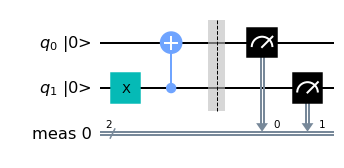

In [72]:
# comparision circuit
qc_comp = qiskit.QuantumCircuit(2)
qc_comp.x(1)

qc_comp.cx(1,0)

qc_comp.measure_all()
qc_comp.draw(initial_state=True, output="mpl")

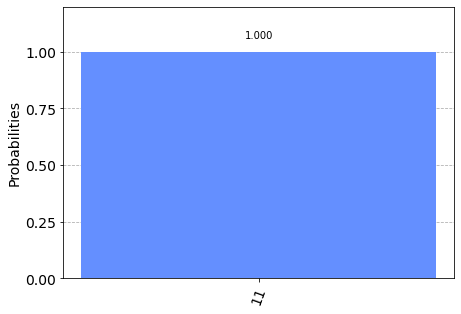

In [77]:
result = qiskit.execute(qc_comp, backend=backend).result()
plot_histogram(result.get_counts())

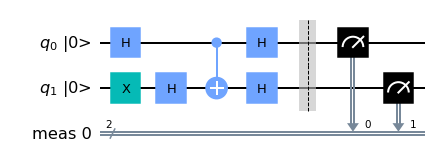

In [115]:
#s imple phase kickback
qc = qiskit.QuantumCircuit(2)

qc.x(1)

qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)

qc.measure_all()
qc.draw(initial_state=True, output="mpl")

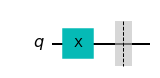

In [116]:
backend = qiskit.Aer.get_backend("aer_simulator")
job = qiskit.execute(qc, backend=backend)

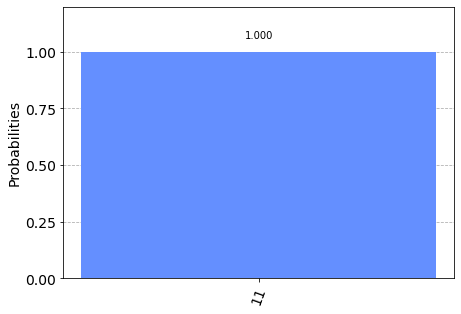

In [117]:
plot_histogram(job.result().get_counts())

## Explanation

After passing through the first Hadamard gate $ q_{1} $ is in a superposition, which is described by the following wave function:
$ |\psi_{1}> = \frac{1}{\sqrt{2}} |0> + \frac{1}{\sqrt{2}} |1>$ 

The wave function for $q_{2}$ after passing through the Hadamard gate is $ |\psi_{2}> = \frac{1}{\sqrt{2}} |0> - \frac{1}{\sqrt{2}} |1>$ 

By taking the tensor product we get the wave function of the combined two qbit system:

$ |\psi> = \frac{1}{2} (|0> + |1>) \otimes (|0> - |1>) $

$ = \frac{1}{2} (|00> + |10> -|01> -|11> ) $

The cnot gate swaps the probability amplitudes of the |10> and |11> states, resulting in

$|\psi> =\frac{1}{2} (|00> - |10> - |01> + |11>) $

$=\frac{1}{2} (|1> - |0>) \otimes (|1> - |0>) $

As we can see, the cnot gate has only had an effect on the control gate and not on the target gate. When we now apply the Hadamard gate we get the result |11>.
This is a classical example of "Phase Kickback".

In [ ]:
from qiskit.visualization import array_to_latex

In [132]:
# qbit q1
qc = qiskit.QuantumCircuit(1)

qc.h(0)
qc.save_statevector()

result = qiskit.execute(qc, backend=backend).result()
array_to_latex(result.get_statevector(), prefix="| \psi_{1}> = ")

<IPython.core.display.Latex object>

In [134]:
# qbit q2
qc = qiskit.QuantumCircuit(1)

qc.x(0)
qc.h(0)
qc.save_statevector()

result = qiskit.execute(qc, backend=backend).result()
array_to_latex(result.get_statevector(), prefix="| \psi_{2}> = ")

<IPython.core.display.Latex object>

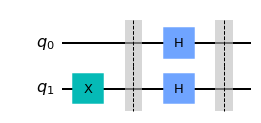

In [137]:
# wave function of combined qbit system before cnot
qc = qiskit.QuantumCircuit(2)

qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)

qc.save_statevector()

qc.draw(output="mpl")

In [138]:
result = qiskit.execute(qc, backend=backend).result()
array_to_latex(result.get_statevector(), prefix="| \psi> = ")

<IPython.core.display.Latex object>

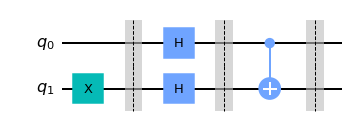

In [142]:
# cnot gate
qc = qiskit.QuantumCircuit(2)

qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0, 1)


qc.save_statevector()
qc.draw(output="mpl")

In [143]:
result = qiskit.execute(qc, backend=backend).result()
array_to_latex(result.get_statevector(), prefix="| \psi> = ")

<IPython.core.display.Latex object>

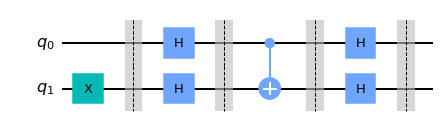

In [148]:
# 
qc = qiskit.QuantumCircuit(2)

qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0, 1)
qc.barrier()
qc.h(0)
qc.h(1)

qc.save_statevector()
qc.draw(output="mpl")

In [151]:
result = qiskit.execute(qc, backend=backend).result()
array_to_latex(result.get_statevector(), prefix="| \psi> = ")

<IPython.core.display.Latex object>

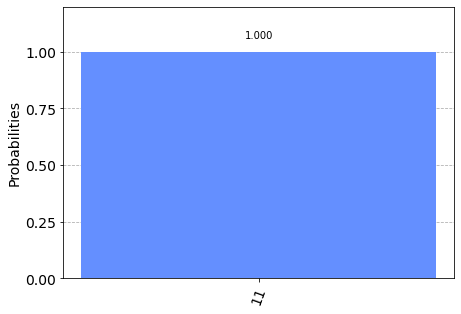

In [150]:
plot_histogram(result.get_counts())